# Representative Years

A metric system was created based on the hypothesis that the comfortable temperature levels are between 18 to 22°C. Under 18 °C, people will start using their heaters, and over 22 °C, they will start using their air-conditioners. This is supported by the figures. 

Therefore, the metric system takes into consideration the mean and peak deviations from these values. Since the focus is to cover the extreme cases, the years were ranked based on the summer-warmness and winter-coldness. 

In [2]:
from IPython.display import display, HTML#, clear_output, Image, Audio

import sys
import os

import pandas as pd
import numpy as np
from datetime import datetime, timedelta, date
from sklearn.metrics import r2_score

# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = "Cambria"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['mathtext.fontset'] = "stix"
plt.rcParams['figure.facecolor'] = 'white'

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200

# demand fingerprint module
sys.path.insert(0, "../../demandfingerprint/")
import pdhelper

sys.path.insert(0, "./modules/")
import temphelper
import plthelper
import plots

#dir management
data_dir = './data/'

In [3]:
# load temperature data
# uses the monthly demand weighted temperature
kyushu_mean_temp_src = pd.read_csv(data_dir+'kyushu_temp_demand_weighted.csv', index_col='datetime')
kyushu_mean_temp_src.index = pd.to_datetime(kyushu_mean_temp_src.index)
kyushu_mean_temp = kyushu_mean_temp_src.copy()
kyushu_temp = kyushu_mean_temp['kyushu']

In [4]:
offset_data = dict()
for year in range(1990, 2021):
    offset_data[year] = temphelper.get_temp_offset_stat(kyushu_temp, year)

In [5]:
mean_warm_rank = pdhelper.dfdictExtractColumn(offset_data, 'warmmean')
mean_warm_rank = mean_warm_rank.T[[5,6,7,8]].sort_values([8,7,6,5], ascending=False)
mean_warm_rank['mean_warm_rank'] = list(range(len(mean_warm_rank)))

In [6]:
mean_cold_rank = pdhelper.dfdictExtractColumn(offset_data, 'coldmean')
mean_cold_rank = mean_cold_rank.T[[1,2,11,12]].sort_values([2,1,12,11])
mean_cold_rank['mean_cold_rank'] = list(range(len(mean_cold_rank)))

In [7]:
warm_rank = pdhelper.dfdictExtractColumn(offset_data, 'warmpeak')
warm_rank = warm_rank.applymap(lambda x: round(x,2)).T[[5,6,7,8]].sort_values([8,7,6,5], ascending=False)
warm_rank['warm_rank'] = list(range(len(warm_rank)))

In [8]:
cold_rank = pdhelper.dfdictExtractColumn(offset_data, 'coldpeak').applymap(
    lambda x: round(x,2)).T[[1,2,11,12]].sort_values([2,1,12,11])
cold_rank['cold_rank'] = list(range(len(cold_rank)))

In [9]:
weather_rank = pd.concat([warm_rank, mean_warm_rank['mean_warm_rank'], 
                          cold_rank, mean_cold_rank['mean_cold_rank']], axis=1)
weather_rank['overall'] = weather_rank[['warm_rank', 'cold_rank']].sum(axis=1)
weather_rank.sort_values(['overall', 'warm_rank', 'cold_rank'])

,5,6,7,8,warm_rank,mean_warm_rank,1,2,11,12,cold_rank,mean_cold_rank,overall
2018,7.09,9.05,12.27,13.18,2,1,-18.36,-18.69,-14.01,-15.79,7,4,9
2013,7.28,8.40,12.53,13.71,0,3,-17.56,-18.06,-13.10,-15.76,13,15,13
2001,5.42,9.24,11.59,12.46,9,14,-19.71,-19.13,-11.37,-16.49,4,17,13
2008,5.91,7.77,12.32,12.51,8,23,-16.49,-18.75,-13.64,-17.76,6,2,14
2012,5.54,8.05,12.49,12.23,16,12,-17.86,-21.28,-14.58,-16.87,0,3,16
1996,5.29,9.72,12.12,12.15,17,18,-17.98,-20.85,-12.13,-17.70,1,0,18
2007,7.96,10.00,11.92,12.14,18,9,-16.98,-19.63,-13.83,-16.02,3,28,21
1995,5.41,6.70,11.04,12.68,7,10,-20.25,-17.74,-13.30,-20.04,15,7,22
2006,4.72,7.95,11.68,12.32,14,11,-18.53,-18.68,-10.59,-18.81,8,18,22
1994,5.87,10.10,13.09,13.26,1,6,-19.53,-16.77,-12.30,-17.41,24,10,25


### Warmest Summers 

In [10]:
weather_rank.sort_values(['warm_rank']).head(5)

,5,6,7,8,warm_rank,mean_warm_rank,1,2,11,12,cold_rank,mean_cold_rank,overall
2013,7.28,8.40,12.53,13.71,0,3,-17.56,-18.06,-13.10,-15.76,13,15,13
1994,5.87,10.10,13.09,13.26,1,6,-19.53,-16.77,-12.30,-17.41,24,10,25
2018,7.09,9.05,12.27,13.18,2,1,-18.36,-18.69,-14.01,-15.79,7,4,9
2020,5.79,8.88,10.92,13.16,3,0,-17.16,-16.70,-10.66,-17.40,25,26,28
2016,6.32,7.43,11.57,13.13,4,4,-19.74,-16.80,-13.08,-15.76,23,14,27


### Coldest Summers

In [11]:
weather_rank.sort_values(['warm_rank']).tail(5)

,5,6,7,8,warm_rank,mean_warm_rank,1,2,11,12,cold_rank,mean_cold_rank,overall
1999,4.69,7.86,10.49,11.05,26,24,-17.88,-18.66,-12.15,-17.53,9,8,35
1991,6.50,9.54,12.28,11.01,27,28,-17.40,-20.48,-13.94,-18.02,2,5,29
2009,6.31,8.41,11.45,10.91,28,19,-18.60,-15.73,-13.23,-16.37,29,30,57
2014,7.39,7.11,12.31,10.09,29,29,-17.96,-16.14,-11.18,-17.63,28,13,57
1993,4.99,6.41,10.26,9.89,30,30,-18.41,-18.54,-14.98,-16.61,10,19,40


### Coldest Winter

In [12]:
weather_rank.sort_values(['cold_rank']).head(5)

,5,6,7,8,warm_rank,mean_warm_rank,1,2,11,12,cold_rank,mean_cold_rank,overall
2012,5.54,8.05,12.49,12.23,16,12,-17.86,-21.28,-14.58,-16.87,0,3,16
1996,5.29,9.72,12.12,12.15,17,18,-17.98,-20.85,-12.13,-17.70,1,0,18
1991,6.50,9.54,12.28,11.01,27,28,-17.40,-20.48,-13.94,-18.02,2,5,29
2007,7.96,10.00,11.92,12.14,18,9,-16.98,-19.63,-13.83,-16.02,3,28,21
2001,5.42,9.24,11.59,12.46,9,14,-19.71,-19.13,-11.37,-16.49,4,17,13


### Warmest Winter

In [13]:
weather_rank.sort_values(['cold_rank']).tail(5)

,5,6,7,8,warm_rank,mean_warm_rank,1,2,11,12,cold_rank,mean_cold_rank,overall
2010,4.50,7.64,11.30,12.44,10,2,-17.94,-16.61,-13.84,-17.16,26,25,36
2019,7.46,7.32,11.66,13.11,5,20,-16.93,-16.44,-11.81,-15.15,27,24,32
2014,7.39,7.11,12.31,10.09,29,29,-17.96,-16.14,-11.18,-17.63,28,13,57
2009,6.31,8.41,11.45,10.91,28,19,-18.60,-15.73,-13.23,-16.37,29,30,57
1990,4.17,9.98,11.60,12.42,11,8,-18.11,-15.11,-13.59,-17.56,30,29,41


## Selection 

Based on the summer-warmness and winter-coldness rankings, 6 years were selected as seen in the Table below. 2014 represents the low variability year while 2018 represents high variability. 1990 and 1991 represents the warmer year and colder year, respectively. 2012 and 2013 captures the extreme cases for the coldest winter and warmest summer, respectively. 


Summer | Winter | Representative | Comment
:--: | :--: | :--: | :--
Mild | Mild | 2014 | Low variability
Mild | Severe | 1991 | Colder year
Severe | Mild | 2016 | Warmer year
Severe | Severe | 2018 | High variability
Highest | - | 2013 | Extreme Summer
- | Highest | 2012 | Extreme Winter



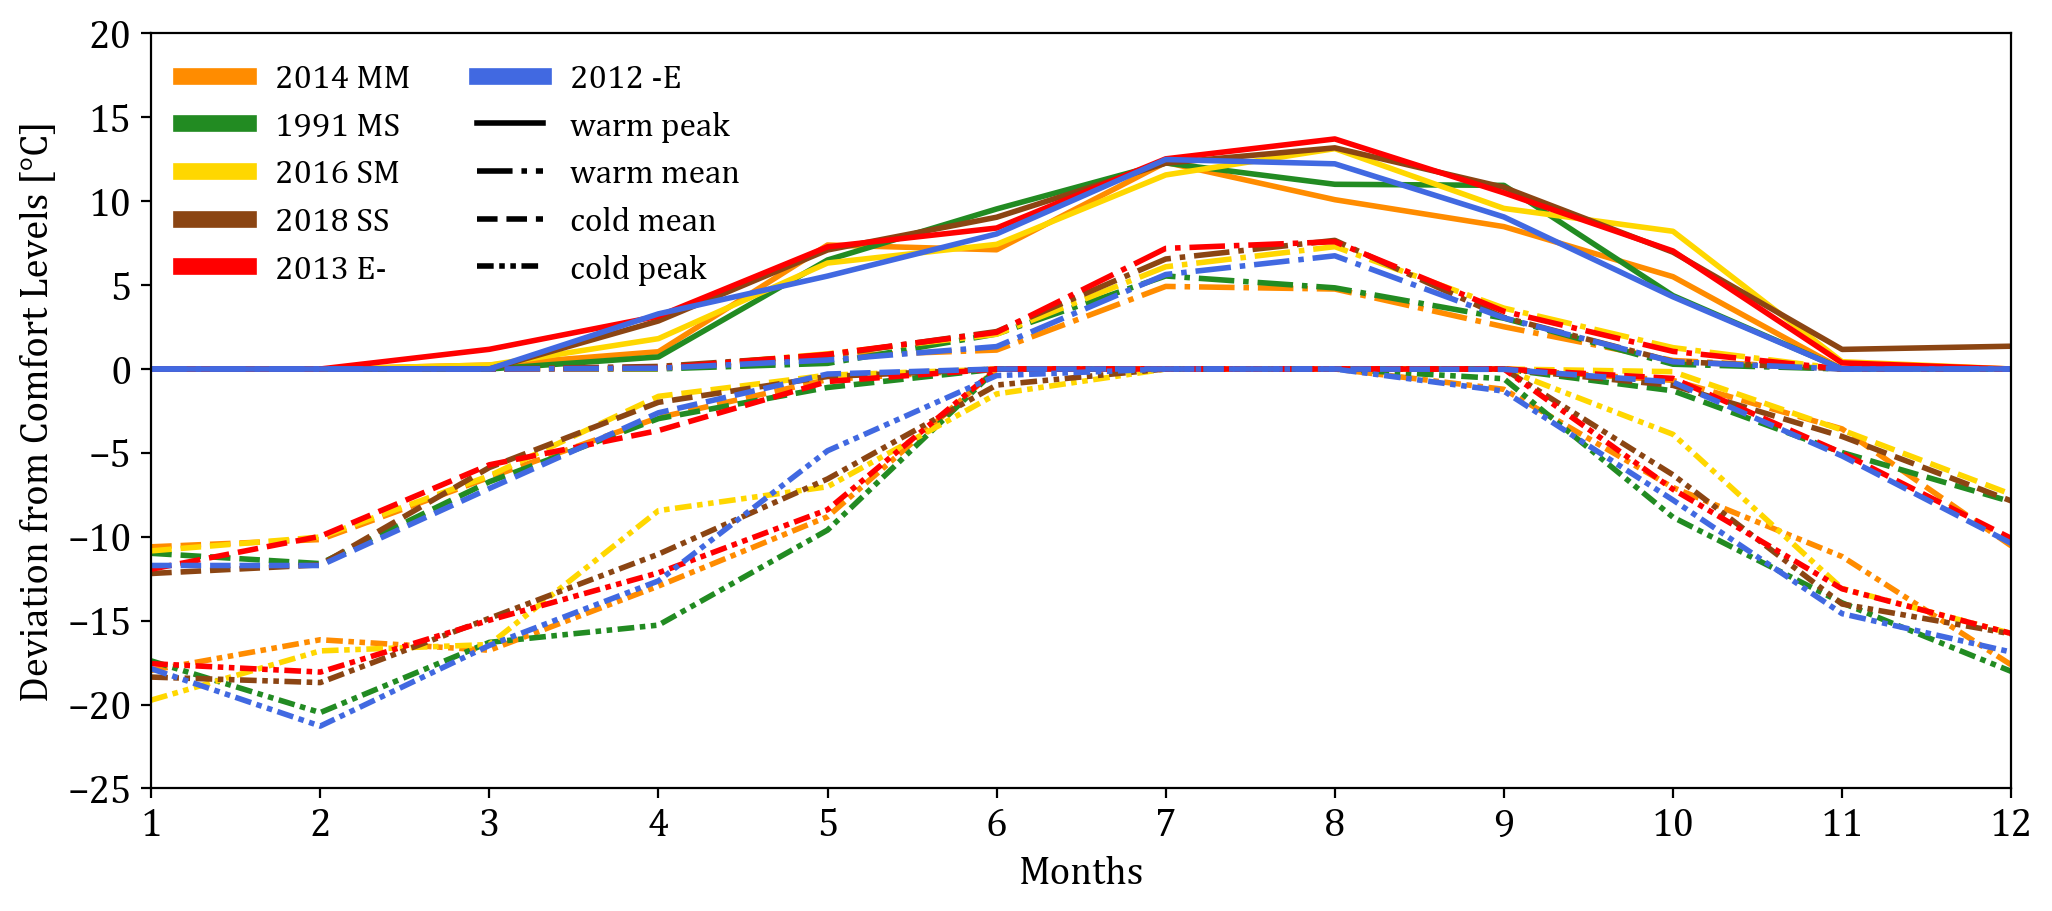

In [14]:
years = [2014, 1991, 2016, 2018, 2013, 2012]
lcolor = ["darkorange", "forestgreen","gold", "saddlebrown", "red", "royalblue"]
linestyles_a = ['-', '-.', '--', (0, (3, 1, 1, 1, 1, 1))]

plthelper.plt_set_size(14)
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,5)    
for year, c in zip(years, lcolor):
    dfx = temphelper.get_temp_offset_stat(kyushu_temp, year)
    for col, ls in zip(plots.cols2, linestyles_a):
        dfx[col].plot(ax=ax, color=c, linestyle=ls, legend=False, lw=2)
ax.set_xlim(1,12)
ax.set_ylim(-25,20)
ax.set(xlabel = 'Months', ylabel = 'Deviation from Comfort Levels [°C]')
ax.set_xticks(range(1,13));
ax.legend(handles=plots.legend_elements_rep_year(), ncol=2, loc='upper left', edgecolor='white', fontsize=12, framealpha = 0);

# Calculating the Frequency of Occurence

In [15]:
# assign temperature features based on the summer months (6, 7, 8, 9) and 
# winter months (11, 12, 1, 2)
temp_features = dict()
for year in range (1990, 2020):
    dfx = temphelper.get_temp_offset_stat(kyushu_temp, year)
    
    #get the features from the summer months and winter months
    features = dfx.loc[[6, 7,8, 9],['warmpeak', 'warmmean']].values.reshape(1,8)[0].tolist() + \
            dfx.loc[[11, 12, 1, 2],['coldmean', 'coldpeak']].values.reshape(1,8)[0].tolist()
    temp_features[year] = features
    
temp_features = pd.DataFrame(temp_features)

# r2_scoring
score_board = []
for year in years:
    score = dict()
    ref_year = temp_features[year]
    for col in temp_features:
        score[col] = r2_score(ref_year, temp_features[col])
        dfx = pd.DataFrame(score.values(), index=score.keys(), columns = [year])
    score_board.append(dfx)
score_board = pd.concat(score_board, axis=1)

# counting the representative
year_rep = dict()
for year in range(1990,2020):
    year_rep[year] = score_board.loc[year].idxmax()
year_rep = pd.DataFrame(year_rep.values(), year_rep.keys(), columns = ['rep'])

year_rep['rep'].value_counts().to_frame('Frequency')

,Frequency
2016,8
1991,6
2013,5
2018,5
2012,4
2014,2


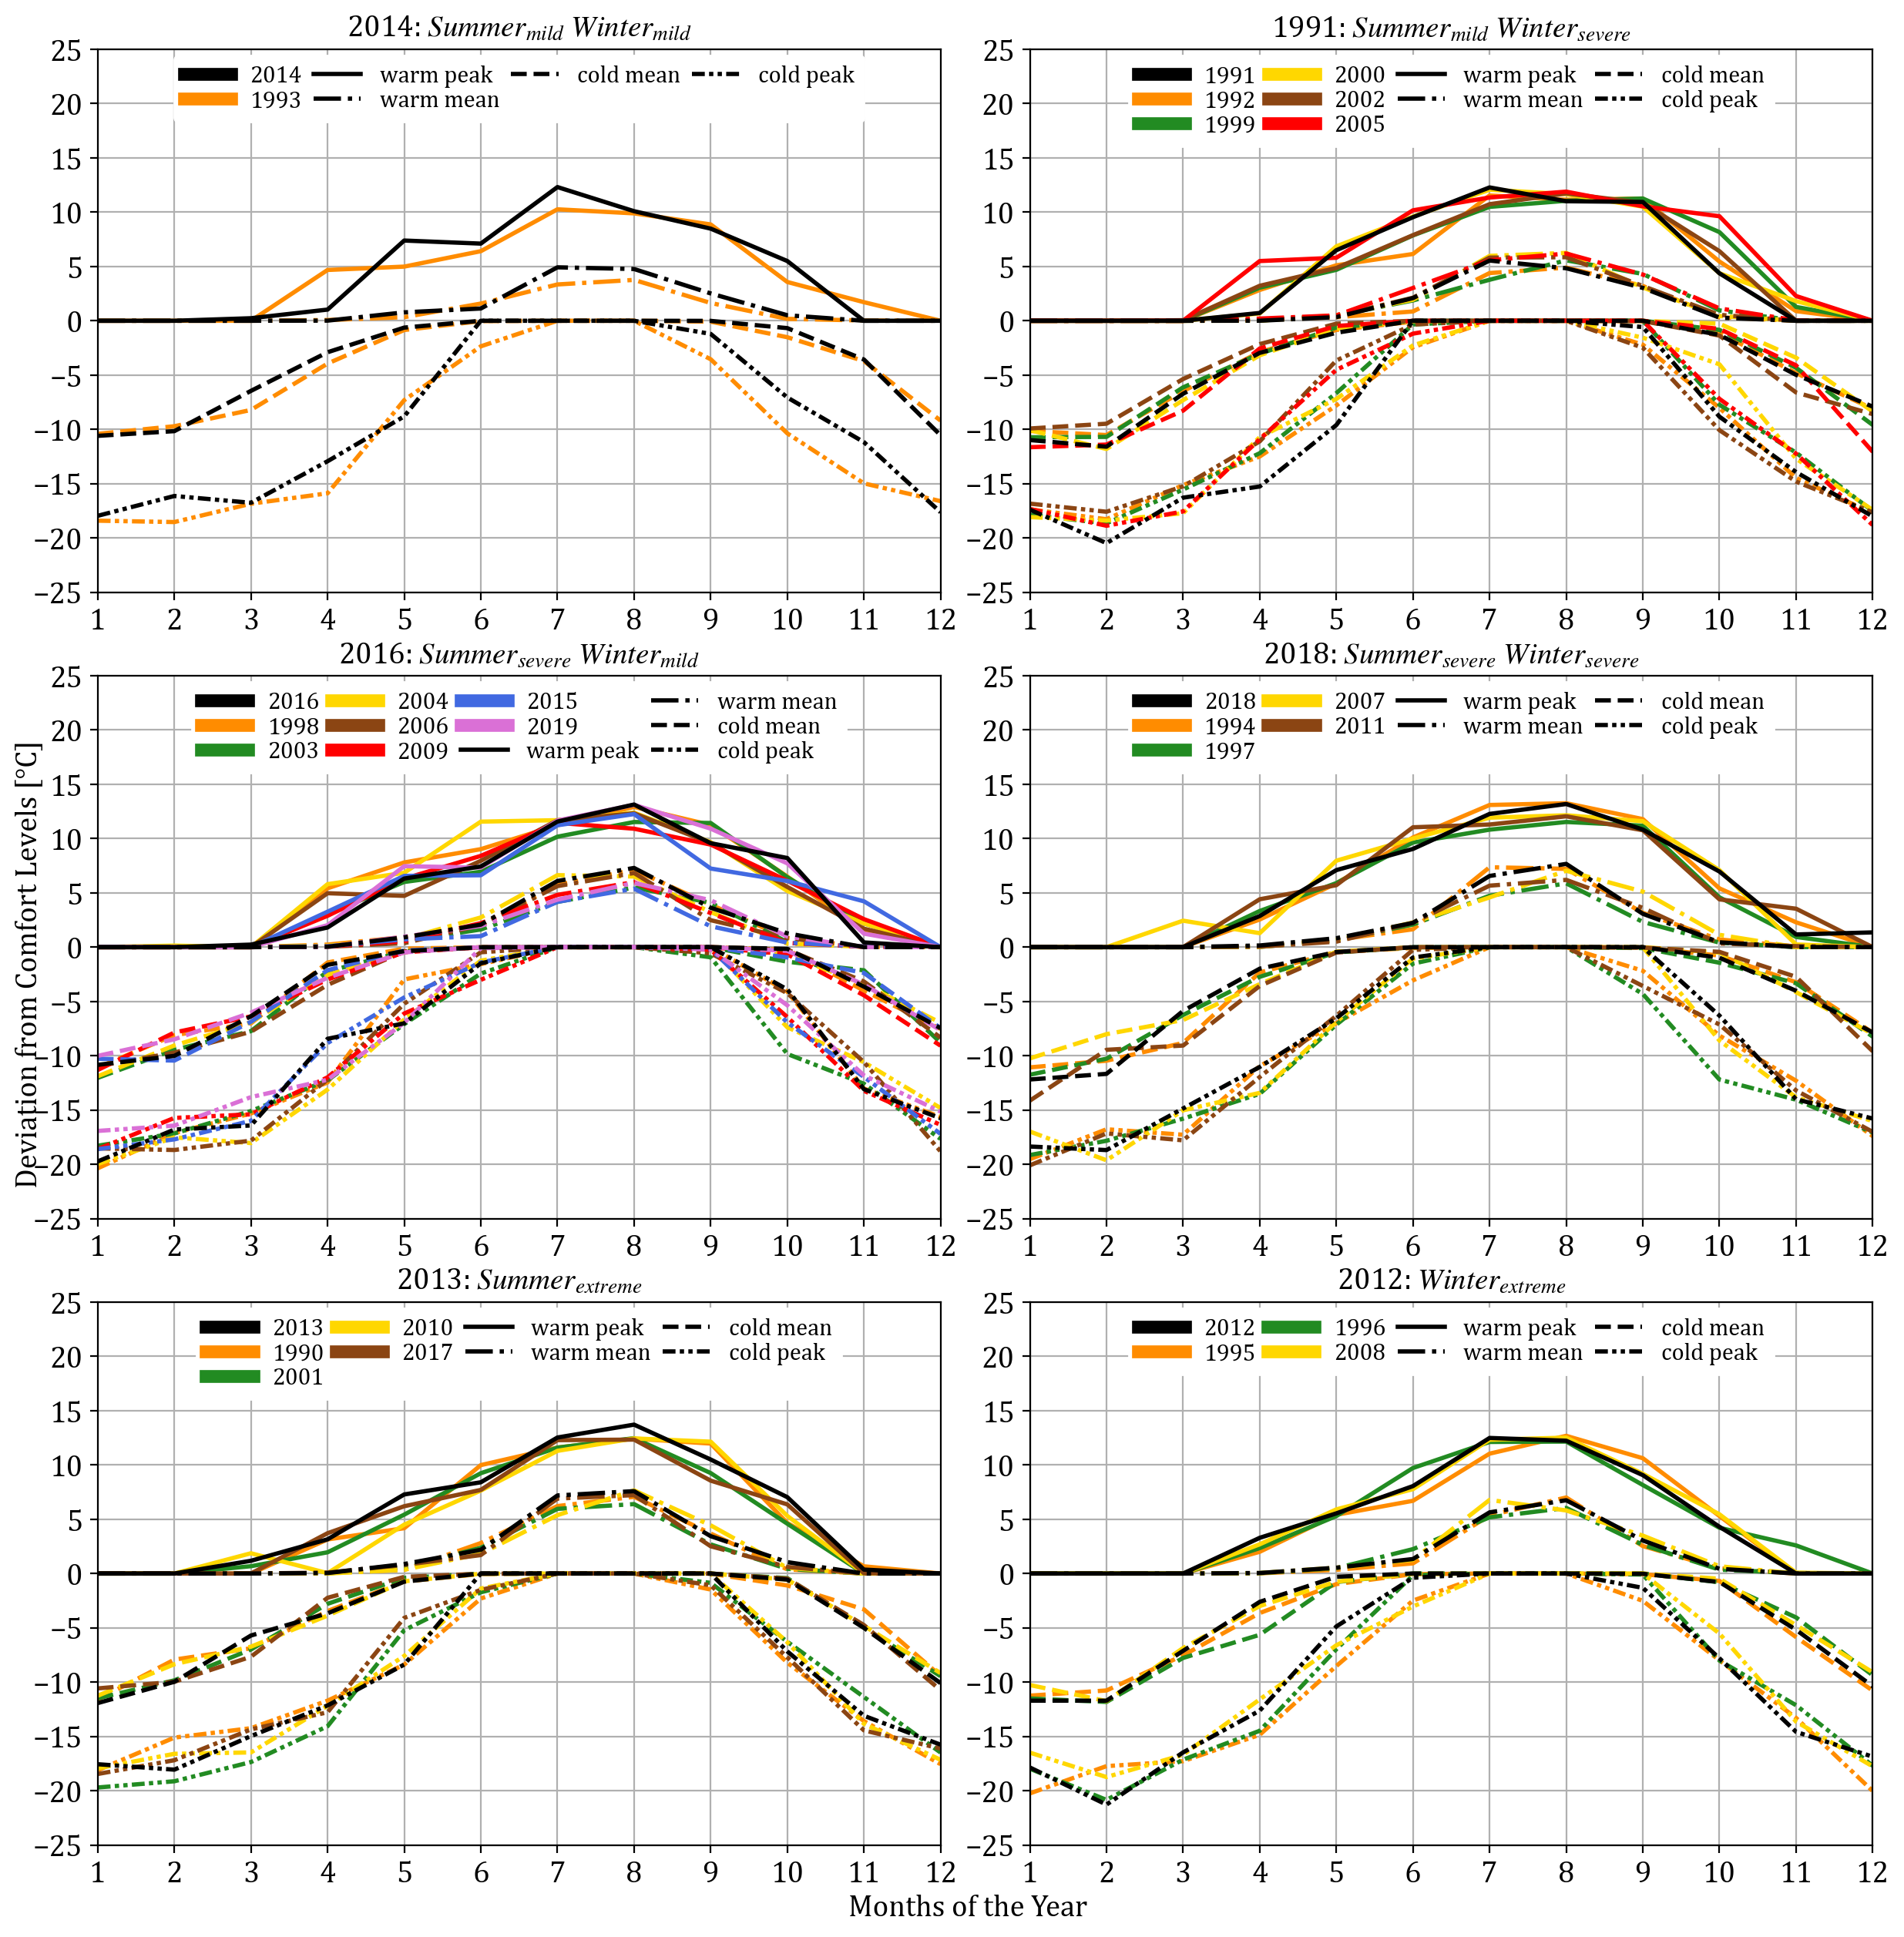

In [16]:
plthelper.plt_set_size(14)
fig, axs = plt.subplots(3,2)
fig.set_size_inches(12,12) 

axs = [item for sublist in axs for item in sublist]
plt.tight_layout(pad=0, w_pad=.5, h_pad=1)

for ax, year, title in zip(axs, years, plots.weather_labels()):
    plots.plot_year_cluster(ax, kyushu_temp, year_rep, year)
    ax.set_title(f'{year}: {title}')

fig.text(-0.015, 0.5, 'Deviation from Comfort Levels [°C]', rotation=90, size = 14, va='center');    
fig.text(0.5, -0.015, 'Months of the Year', size = 14, ha='center');    